In [ ]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
PATH = 'drive/MyDrive/Data_mining/Competition4/comp_4_data.csv'
data = pd.read_csv(PATH)

In [ ]:
display(data.head(10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
5,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
6,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
7,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
8,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
9,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
len(data)

30488

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  pdays           30488 non-null  int64  
 12  previous        30488 non-null  int64  
 13  poutcome        30488 non-null  object 
 14  emp.var.rate    30488 non-null  float64
 15  cons.price.idx  30488 non-null  float64
 16  cons.conf.idx   30488 non-null  float64
 17  euribor3m       30488 non-null 

In [ ]:
data.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488,30488,30488,30488,30488,30488,30488,30488,30488,30488.000000,30488.000000,30488.000000,30488,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
unique,NaN,11,3,7,2,2,2,2,10,5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,NaN,8737,17492,10412,30485,16521,25720,20443,9733,6395,NaN,NaN,NaN,25836,NaN,NaN,NaN,NaN,NaN
mean,39.030012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.521451,956.332295,0.194273,NaN,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.720150,201.373292,0.522788,NaN,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,999.000000,0.000000,NaN,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000


# Data visualizations

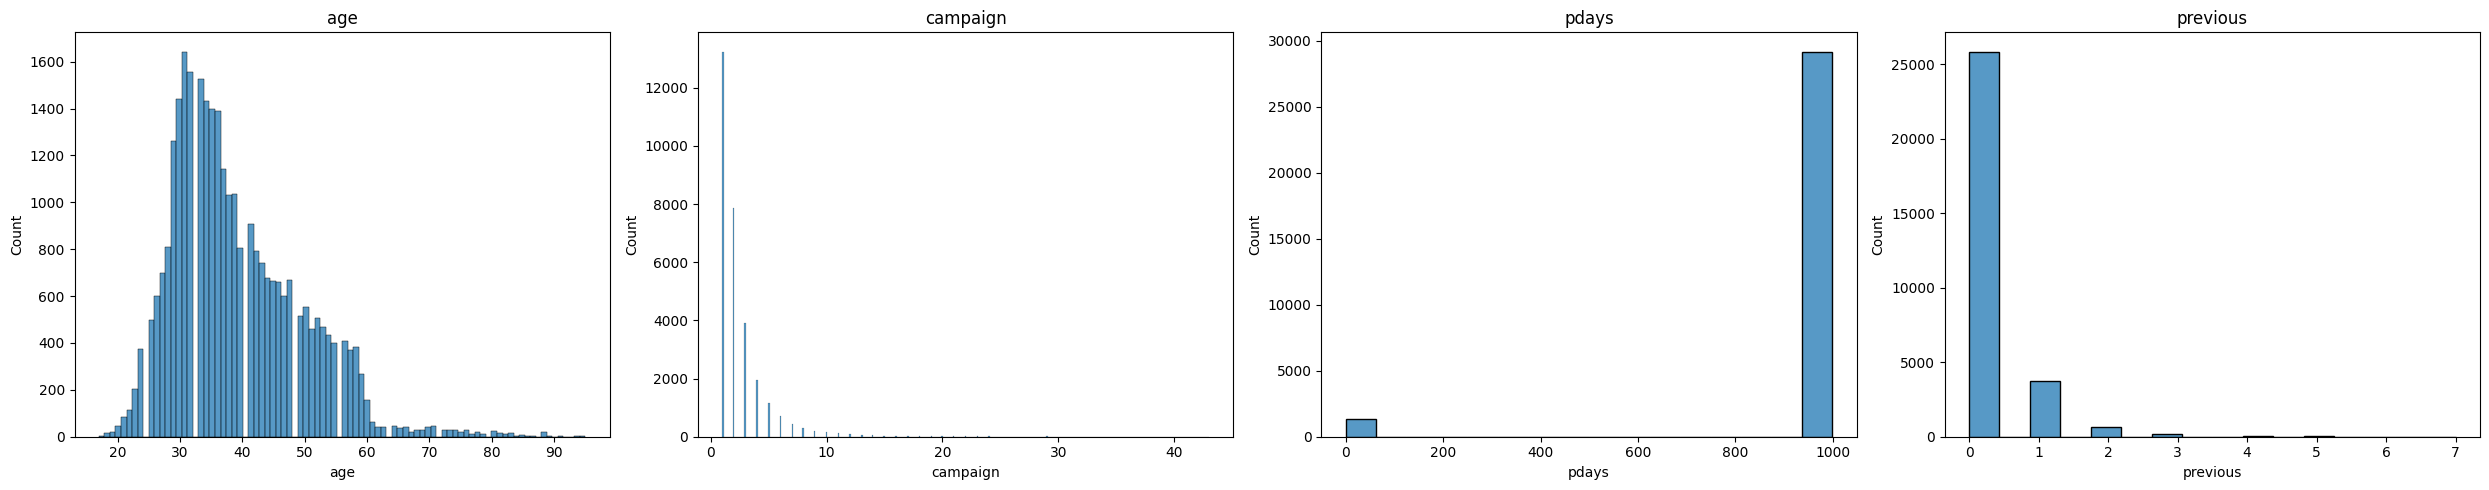

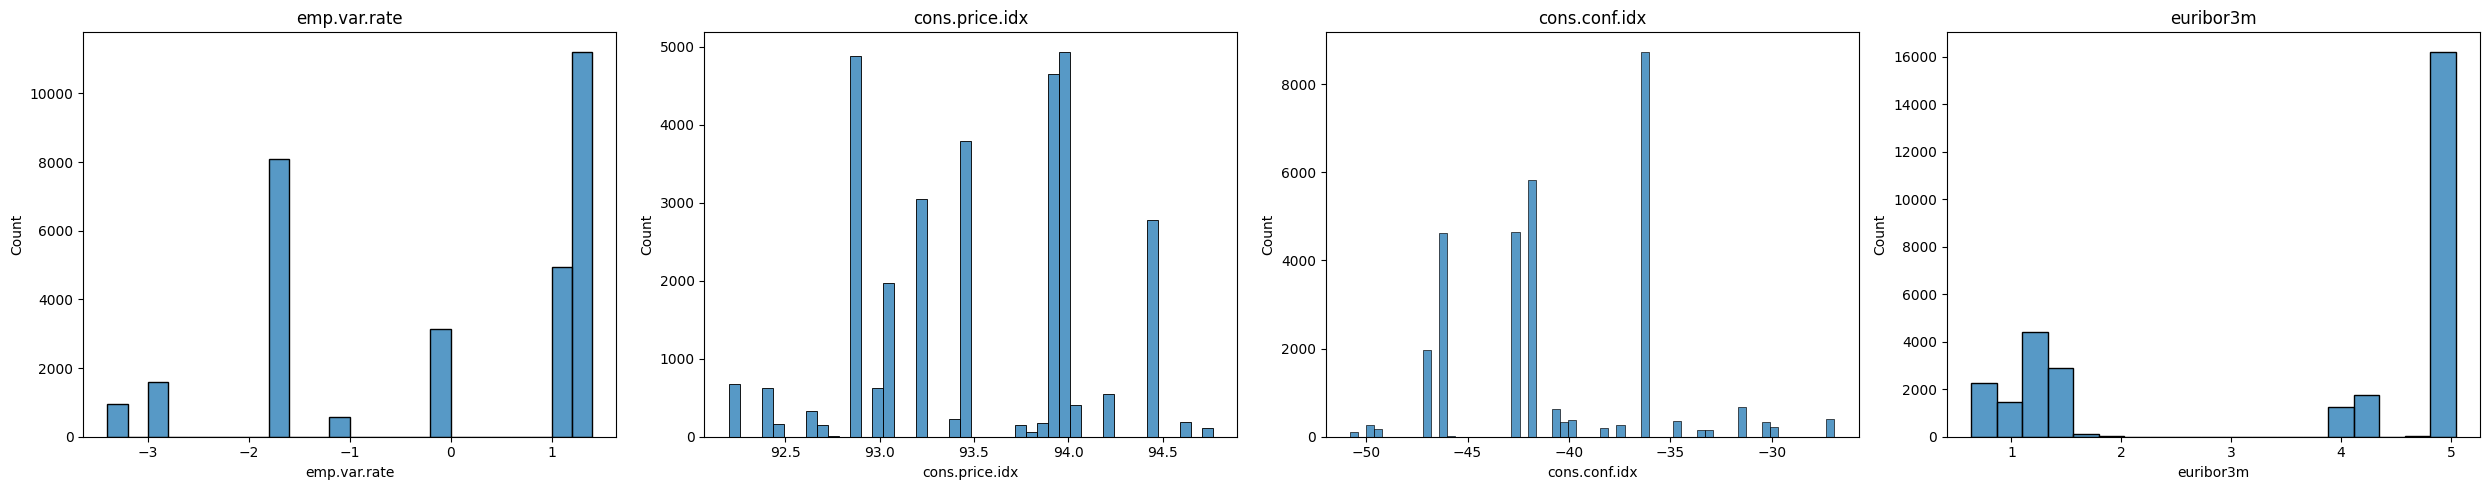

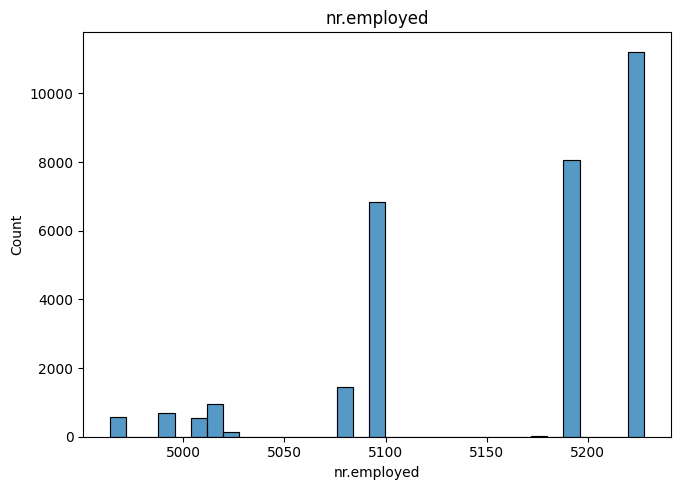

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
columns = 4
num_batches = math.ceil(len(numeric_columns) / columns)

for batch in range(num_batches):
    batch_columns = numeric_columns[batch * columns:(batch + 1) * columns]

    plt.figure(figsize=(25, 5))
    for i, col in enumerate(batch_columns):
        plt.subplot(1, columns, i + 1)
        sns.histplot(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()


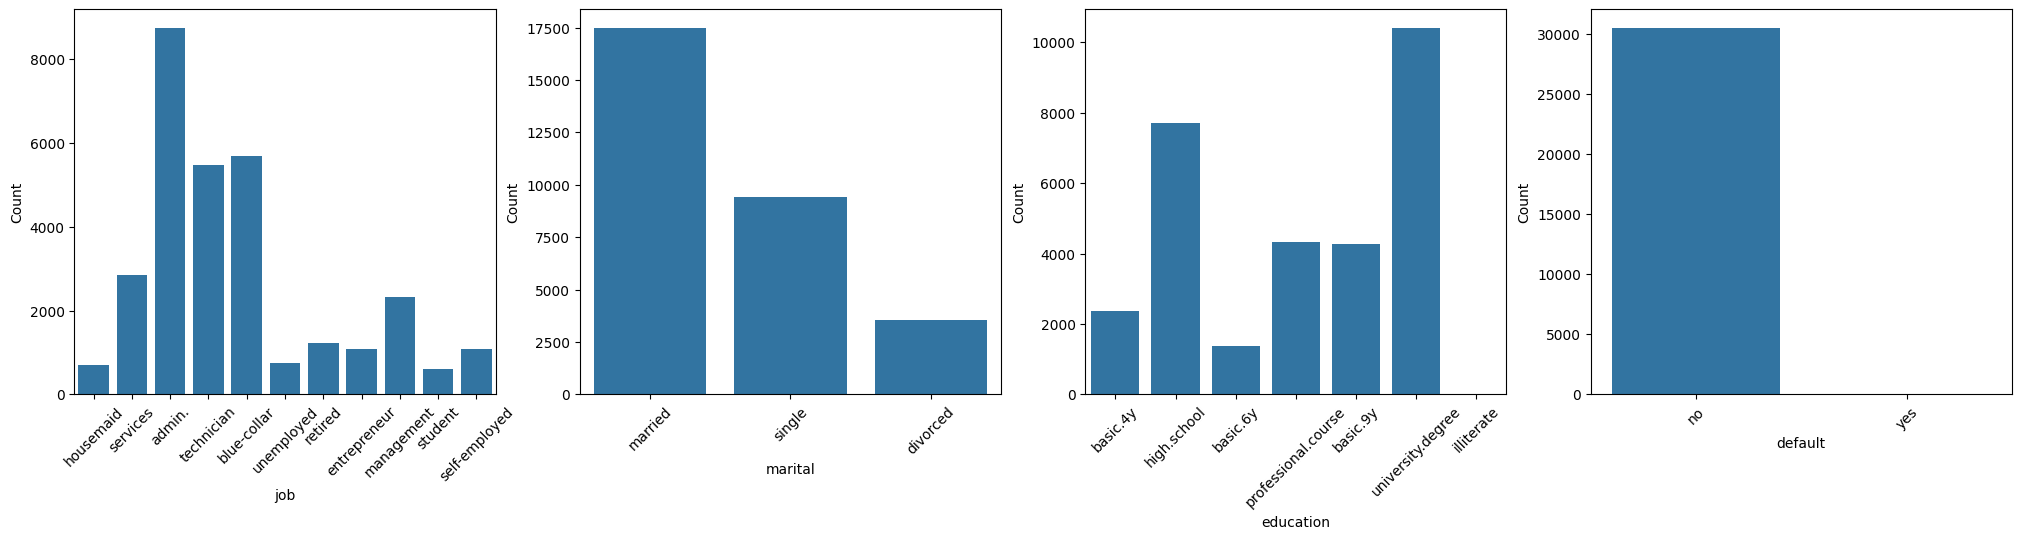

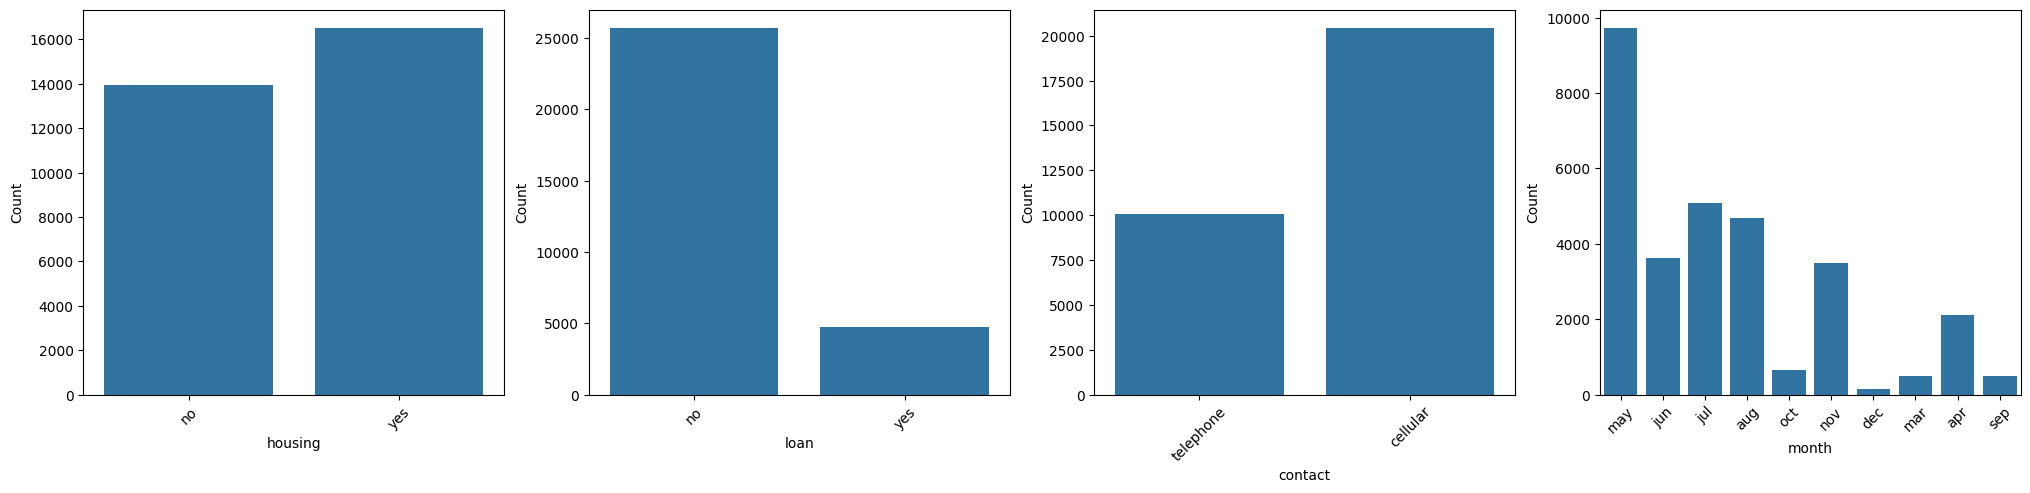

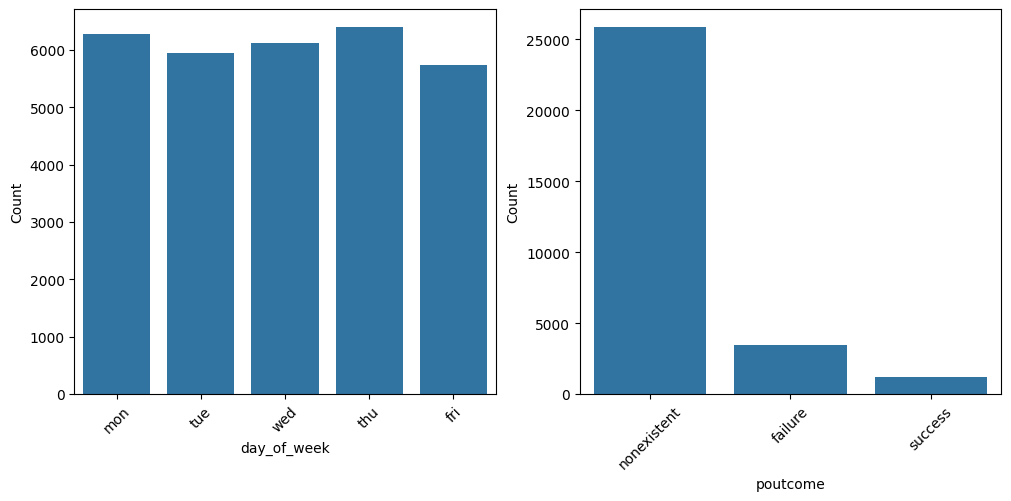

In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

columns = 4
num_batches = math.ceil(len(categorical_columns) / columns)

for batch in range(num_batches):
    batch_columns = categorical_columns[batch * columns:(batch + 1) * columns]

    plt.figure(figsize=(25, 5))
    for i, col in enumerate(batch_columns):
      plt.subplot(1, columns, i + 1)
      sns.countplot(x=col, data=data)
      plt.xticks(rotation=45)
      plt.xlabel(col)
      plt.ylabel('Count')


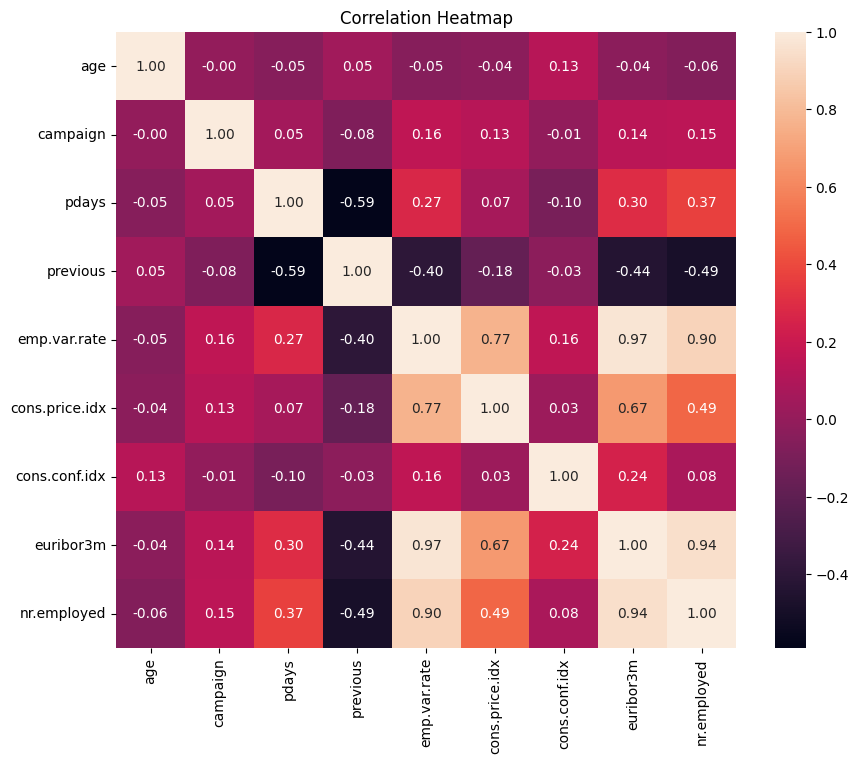

In [ ]:
corr = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
print(data['pdays'].value_counts())

pdays
999    29178
3        381
6        363
4        102
2         53
9         53
7         50
12        50
5         43
10        40
13        33
11        25
15        22
1         21
14        17
0         14
8         13
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: count, dtype: int64


In [ ]:
# adding new column to data based on pdays - whether they were contacted or not
data['contacted'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)

**Bank client data:**

Age (numeric)

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

Dayofweek: last contact day of the week (categorical:'mon','tue','wed','thu','fri')

**Other attributes:**

Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)

Previous: number of contacts performed before this campaign and for
this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

**Social and economic context attributes**

Emp.var.rate: employment variation rate - quarterly indicator
(numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)

# Encoding categorical variables

In [ ]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

In [ ]:
# encoding ordinal categorical variables
data['education'] = data['education'].map({'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'professional.course':6 , 'university.degree':7})

In [ ]:
# creating one hot / binary encoding for the rest of the categorical variables
cat_cols = data.columns[data.dtypes == object]
for col_name in cat_cols:
    dummies = pd.get_dummies(data[col_name], prefix = col_name, drop_first = (len(pd.unique(data[col_name])) <= 2))
    data = pd.concat([data.drop(col_name, axis = 1), dummies], axis = 1)

In [ ]:
data.columns[data.dtypes == object]

Index([], dtype='object')

# Unsupervised learning

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

## KMeans

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


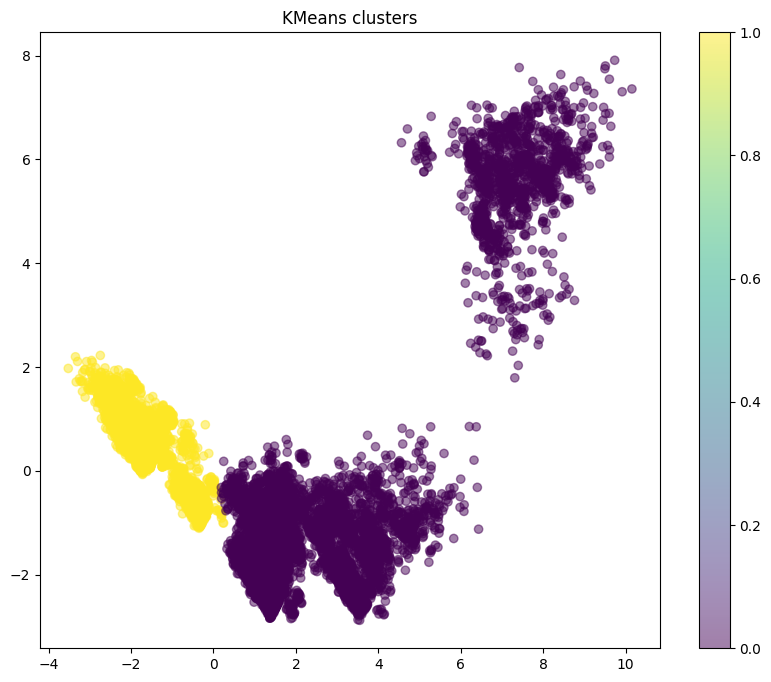

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled)
labels = kmeans.fit_predict(scaled)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('KMeans clusters')
plt.colorbar()
plt.show()

## DBSCAN

In [ ]:
# finding eps that results in 2 clusters
eps=1
while True:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(scaled)
    labels = dbscan.labels_
    # excluding outliers from labels
    if -1 in labels:
      n_clusters = len(set(labels))-1
    else:
      n_clusters = len(set(labels))
    print(n_clusters)
    if n_clusters == 2:
      print(f'value for eps is {eps} with {n_clusters} clusters')
      break
    eps+=1

924
1297
736
146
52
37
26
4
2
value for eps is 9 with 2 clusters


In [ ]:
clusters = DBSCAN(eps = 9).fit_predict(scaled)

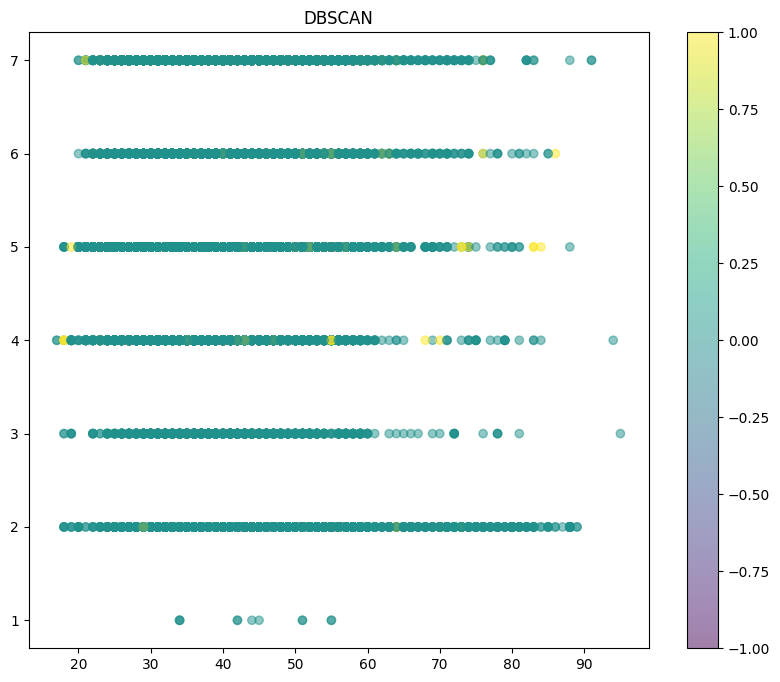

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.title('DBSCAN')
plt.colorbar()
plt.show()

In [ ]:
print(np.unique(clusters))

[-1  0  1]


In [ ]:
# sum of outliers
len(clusters[clusters==-1])

3

In [ ]:
data['cluster'] = clusters

In [ ]:
# checking mean of features to make sure Im correctly assigning the labels
cluster_means = data.groupby('cluster').mean()
print(cluster_means)

               age  education  campaign       pdays  previous  emp.var.rate  \
cluster                                                                       
-1       42.333333   5.666667  1.333333  999.000000  0.333333      0.900000   
 0       38.992944   5.356568  2.523707  957.384068  0.192067     -0.057369   
 1       46.127389   5.579618  2.108280  752.343949  0.617834     -2.821656   

         cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  \
cluster                                                         ...   
-1            93.362667     -38.066667   4.693000  5217.333333  ...   
 0            93.527508     -40.637615   3.473123  5161.468270  ...   
 1            92.715739     -33.821656   0.889350  5033.232484  ...   

         month_oct  month_sep  day_of_week_fri  day_of_week_mon  \
cluster                                                           
-1        0.000000   0.000000         0.000000         0.000000   
 0        0.021169   0.016322         0.188308 

In [ ]:
outliers = data[data['cluster'] == -1]
print(outliers.describe())

             age  education  campaign  pdays  previous  emp.var.rate  \
count   3.000000   3.000000  3.000000    3.0  3.000000      3.000000   
mean   42.333333   5.666667  1.333333  999.0  0.333333      0.900000   
std     9.814955   0.577350  0.577350    0.0  0.577350      0.866025   
min    31.000000   5.000000  1.000000  999.0  0.000000     -0.100000   
25%    39.500000   5.500000  1.000000  999.0  0.000000      0.650000   
50%    48.000000   6.000000  1.000000  999.0  0.000000      1.400000   
75%    48.000000   6.000000  1.500000  999.0  0.500000      1.400000   
max    48.000000   6.000000  2.000000  999.0  1.000000      1.400000   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  contacted  \
count        3.000000       3.000000   3.000000     3.000000        3.0   
mean        93.362667     -38.066667   4.693000  5217.333333        0.0   
std          0.140873       3.406367   0.467654    18.648414        0.0   
min         93.200000     -42.000000   4.153000  51

# Submission

In [ ]:
cluster_to_prediction = {-1: 'no', 0: 'no', 1: 'yes'}
data['pred'] = data['cluster'].map(cluster_to_prediction)

submission = data['pred']
print(len(submission) == 30488)
submission.to_csv('drive/MyDrive/Data_mining/submission.csv', index=False, header=False)


True
